<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install finterstellar

In [20]:
import finterstellar as fs

## 우량주

- 가치주가 적정주가보다 싼 주식을 부르는 용어임에 반해, **우량주는 현재 주가가 어떤지는 따지지 않는다.**  
- 기업 자체의 수익성이 좋은지, 안전한지 등을 따진다.  
- 자본금 대비 얼마만큼을 벌어오느냐를 측정하는 지표인 ROA와 ROE로 측정한다
---
### ROA(자산대비이익), ROE(자본대비이익)
- ROA는 회사가 가진 총자산을 이용해 얼마나 벌어왔는지 그 수익률을 파악할 수 있게 하는 지표이다.  
- ROA가 0.1이라면 자산이 10억인 회사가 이익을 1억, 즉 10%수익을 만들었다는 뜻이다.
- ROE는 ROA와 같은 개념이나 자산 대신 자본(순자산)으로 산출한다.
- 투자자에게는 ROA보다 ROE가 인기가 높다.

자산대비이익(ROA) 산식
> ROA = $\frac{당기순이익(NET Income)}{평균총자산(Total Assets, Average)}$ = $\frac{당기순이익}{\frac{기초총자산+기말총자산}{2}}$

자본대비이익(ROE) 산식
> ROE = $\frac{당기순이익(NET Income)}{평균총자본(Total Shareholders Equity, Averaged)}$ = $\frac{당기순이익}{\frac{기초총자본+기말총자본}{2}}$
---
####  ROA, ROE의 차이는 기업이 레버리지(부채)를 얼마나 활용하는지를 보여준다.
> ROE=$\frac{이익}{자본}$=$\frac{이익}{자산}$x$\frac{자산}{자본}$=$\frac{이익}{자산}$x$\frac{자본+부채}{자본}$=ROA x 레버리지

- 마지막의 $\frac{자산}{자본}$ 부분은 자기자본 대비 얼마나 자금을 당겼는지를 나타내는 레버리지 비율로 볼 수 있다.
- ROA가 그대로인데 ROE가 올라가는 기업이라면 부채를 잘 활용하는 기업이라고 판단할 수 있다.
- 투자에 있어서 적절한 레버리지는 수익률을 높이는 영양제이다.
- ROA와 ROE가 함께 올라가는 것이 베스트 케이스 이다.

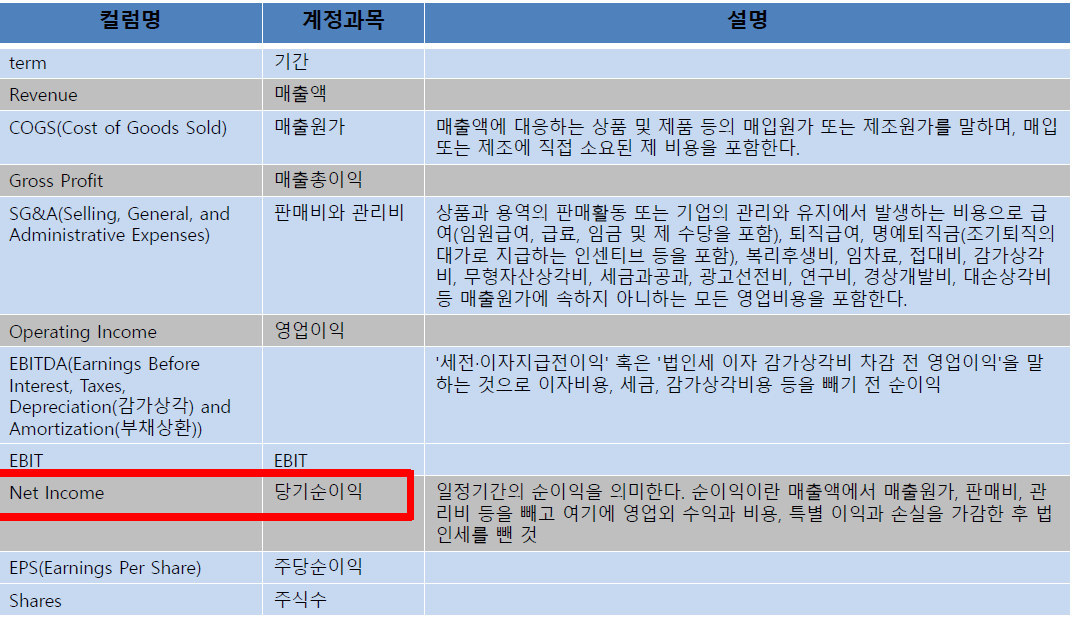

In [21]:
df = fs.fn_single(otp='16486552181099712210', symbol='BABA', window='T') # 알리바바의 재무데이터

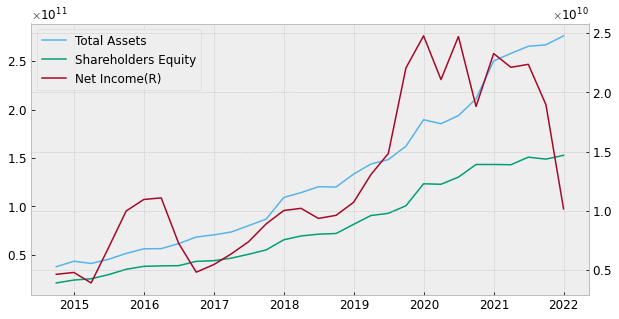

In [22]:
fs.draw_chart(df, left=['Total Assets', 'Shareholders Equity'], right='Net Income')

In [23]:
'''
ROA 계산
ROA 계산을 위해서는 총자산의 기초-기말 평균값을 구해야 한다.
'''
df['Total Assets'].tail()

2020-12-31    2.501797e+11
2021-03-31    2.580066e+11
2021-06-30    2.653184e+11
2021-09-30    2.668670e+11
2021-12-31    2.761150e+11
Name: Total Assets, dtype: float64

In [24]:
df['Total Assets'].shift(4).tail() # 1년 shift

2020-12-31    1.895340e+11
2021-03-31    1.854290e+11
2021-06-30    1.937940e+11
2021-09-30    2.111500e+11
2021-12-31    2.501797e+11
Name: Total Assets, dtype: float64

In [25]:
df['Shifted Total Assets'] = df['Total Assets'].shift(4)
df['Avg Assets'] = (df['Total Assets'] + df['Shifted Total Assets']) / 2
df[['Total Assets', 'Shifted Total Assets', 'Avg Assets']]

,Total Assets,Shifted Total Assets,Avg Assets
2014-09-30,3.785300e+10,NaN,NaN
2014-12-31,4.351500e+10,NaN,NaN
2015-03-31,4.120600e+10,NaN,NaN
2015-06-30,4.549400e+10,NaN,NaN
2015-09-30,5.157000e+10,3.785300e+10,4.471150e+10
2015-12-31,5.629600e+10,4.351500e+10,4.990550e+10
2016-03-31,5.652100e+10,4.120600e+10,4.886350e+10
2016-06-30,6.168800e+10,4.549400e+10,5.359100e+10
2016-09-30,6.844100e+10,5.157000e+10,6.000550e+10
2016-12-31,7.069900e+10,5.629600e+10,6.349750e+10


In [26]:
df['ROA'] = df['Net Income'] / df['Avg Assets']
df[['ROA', 'Net Income', 'Avg Assets']].tail()

,ROA,Net Income,Avg Assets
2020-12-31,0.105897,2.328213e+10,2.198569e+11
2021-03-31,0.099752,2.211686e+10,2.217178e+11
2021-06-30,0.097436,2.236709e+10,2.295562e+11
2021-09-30,0.079321,1.895845e+10,2.390085e+11
2021-12-31,0.038615,1.016148e+10,2.631474e+11


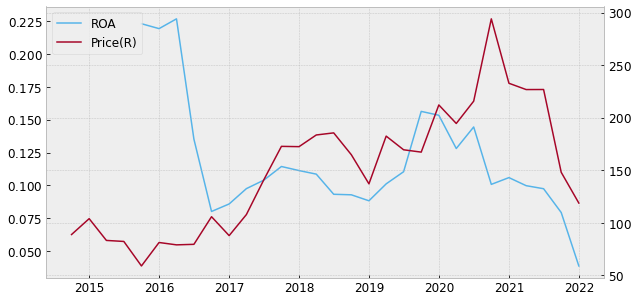

In [27]:
fs.draw_chart(df, left='ROA', right='Price')

In [28]:
'''
ROE 계산
ROE = 당기순이익 / 평균총자본
'''
df['Avg Equity'] = (df['Shareholders Equity'] + df['Shareholders Equity'].shift(4)) / 2
df['ROE'] = df['Net Income'] / df['Avg Equity']
df[['ROE', 'Net Income', 'Avg Equity']].tail()

,ROE,Net Income,Avg Equity
2020-12-31,0.174530,2.328213e+10,1.333986e+11
2021-03-31,0.166261,2.211686e+10,1.330251e+11
2021-06-30,0.159077,2.236709e+10,1.406051e+11
2021-09-30,0.129748,1.895845e+10,1.461171e+11
2021-12-31,0.068619,1.016148e+10,1.480849e+11


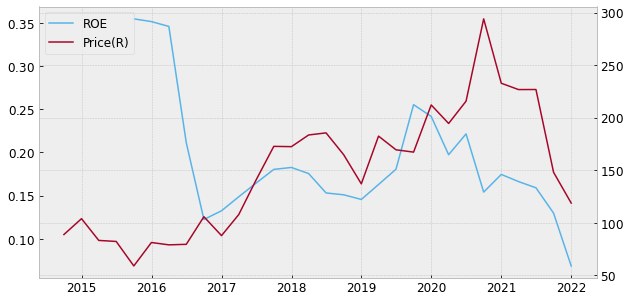

In [29]:
fs.draw_chart(df, left='ROE', right='Price')

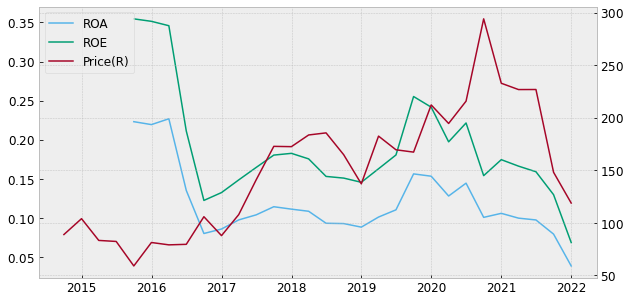

In [30]:
# ROA, ROE 주가를 차트로 작성
fs.draw_chart(df, left=['ROA', 'ROE'], right='Price')

### 자산대비이익(ROA), 자본대비이익(ROE) 백테스트
- ROA, ROE는 투자 효율을 의미하니 높을수록 좋다.

In [31]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16486552181099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [32]:
# ROA 계산
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['ROA'] = data[t]['Net Income'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Net Income'] <0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] <0), 'ROA'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='ROA', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.23%
Accumulated return: 66.51%
Investment period: 10.0yrs
Sharpe ratio: 0.32
MDD: -33.96%


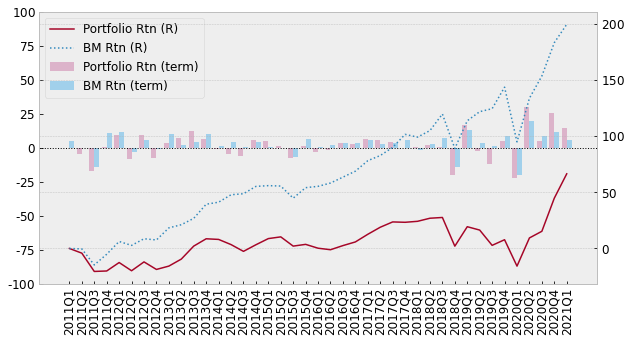

In [33]:
fs.draw_return(df)

In [34]:
# ROE 계산
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[prev_t]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] <0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] <0), 'ROE'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='ROE', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 7.82%
Accumulated return: 112.54%
Investment period: 10.0yrs
Sharpe ratio: 0.61
MDD: -25.78%


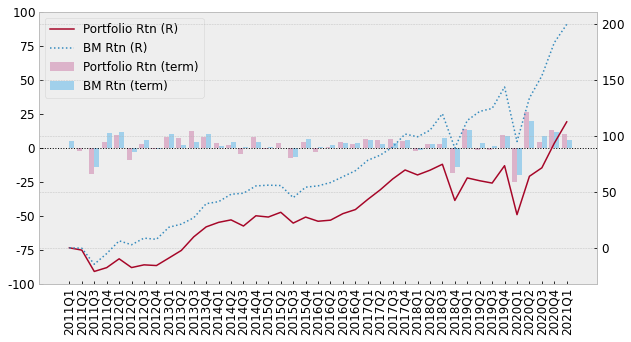

In [35]:
fs.draw_return(df)

### 회계사가 유행시킨 장기투자 전략, RIM(잔여이익모델)
- 은행 예금보다는 수익률을 바라는 투자
- 기업이 창출한 초과이익(잔여이익)을 내 목표수익률과 비교해서 기업의 주가를 산정하는 방식이다.  <br><br>
초과이익(목표 수익률 이상의 수익분) = 이익 - 자본조달비용  
$$기업가치 = 자본 + 초과 이익, 　기업 = 자본 + \frac{초과이익}{목표수익률}$$<br><br>
- RIM 산식
> 주당순자산(BPS)은 PBR을 구할 때와 같이 재무제표의 자본을 주식수로 나누어 계산하고, 자본이익률 ROE는 당기순이익을 자본으로 나눈 값이다.  
RIM은 ROE에 매우 의존적이라 ROE를 어떤 값을 사용하느냐가 큰 영향을 끼친다.  
산출된 적정주가가 실제 주가보다 높다면 현재 주가가 저평가 상태라고 판단할 수 있다.<br><br>
$$기업가치 = 자본 + \frac{이익 - 자본조달비용}{목표수익률} = 자본+\frac{(자본\times자본이익률)-(자본\times목표수익률)}{목표수익률}$$  
$$적정주가 = 주당순자산(BPS) + \frac{자본이익률}{목표수익률}$$


In [36]:
df = fs.fn_single(otp='16486552181099712210', symbol = 'JPM', window='T') # JP모건의 재무 데이터

In [37]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['ROE'] = df['Net Income'] / df['Shareholders Equity']
df['ROE3AVG'] = df['ROE'].rolling(12).mean() # 안정적인 ROE 값을 위해 3년간 이동평균 ROE
df['RIM'] = df['BPS'] * df['ROE3AVG'] / .1 # .1은 목표수익률

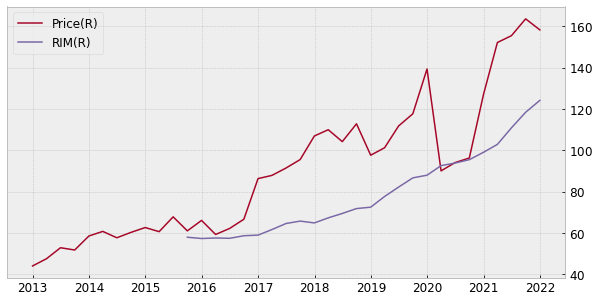

In [38]:
fs.draw_chart(df, right=['Price', 'RIM'])

- 전통적인 배당주인 은행주가 정부의 압력으로 배당을 확대하지 못하는 상황임에도 불구하고 시장은 JP모건의 목표 수익률을 10% 이상으로 바라보고 있는 것이다.

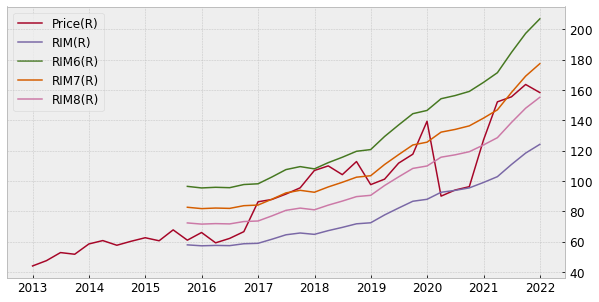

In [40]:
# 밴드 그리기
df['RIM6'] = df['BPS'] * df['ROE3AVG'] / .06
df['RIM7'] = df['BPS'] * df['ROE3AVG'] / .07
df['RIM8'] = df['BPS'] * df['ROE3AVG'] / .08
fs.draw_chart(df, right=['Price', 'RIM', 'RIM6', 'RIM7', 'RIM8'])
# 목표 수익률을 각각 6%, 7%, 8%로 잡아 RIM 적정주가를 산출해 주가와 비교

#### 회계사가 유행시킨 장기투자 전략, RIM(잔여이익모델)
**잔여이익모델(RIM) 백테스팅**
- RIM을 이용한 투자 전략으로 산출한 적정주가보다 실제주가보다 실제 주가가 낮으면(주가 < 적정주가) 주가가 저평가된 상태로 판단하여 매수하고 그렇지 않으면 매도하는 전략
- 투자기간 : 2011년 1분기 ~ 2021년 1분기 완료

In [42]:
for t in terms:
  t_1 = fs.quarters_before(terms, t, 4) # 1년전 값
  t_2 = fs.quarters_before(terms, t, 8) # 2년전 값
  data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
  data[t]['Avg Equity'] = (data[t]['Shareholders Equity'] + data[t_1]['Shareholders Equity']) / 2
  data[t]['ROE'] = data[t]['Net Income'] / data[t]['Avg Equity']
  data[t].loc[(data[t]['Net Income'] <0) | (data[t]['Avg Equity'] < 0) | (data[t]['Shareholders Equity'] < 0), 'ROE'] = float('nan')
  data[t]['Avg ROE'] = (data[t]['ROE'] + data[t_1]['ROE'] + data[t_2]['ROE']) / 3
  data[t]['RIM'] = data[t]['BPS'] * data[t]['Avg ROE'] / .1
  data[t]['P/RIM'] = data[t]['Price_M3'] / data[t]['RIM'] # 적정주가와 실제 주가를 비교하기 위해 프라이스멀티플을 구할 때 했던 것처럼 주가를 정정주가로 나누어 P/RIM 칼럼을 생성

- RIM을 이용한 투자 전략을 테스트
> **P/RIM > 1 이면 주가가 적정주가보다 높으니 고평가, P/RIM < 1 이면 저평가 상태라고 볼 수 있다.**  
주가는 분기 말 기준 3개월 후 주가인 Price_M3를 사용한다.(리밸런싱도 3개월 후 계획)  
저평가된 종목을 찾기 위해 fn_filter() 함수를 사용해 P/RIM이 낮은 30개 종목을 선정

In [44]:
s, signal = {}, {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='P/RIM', floor=0, cap=1, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.97%
Accumulated return: 96.32%
Investment period: 10.0yrs
Sharpe ratio: 0.35
MDD: -46.61%


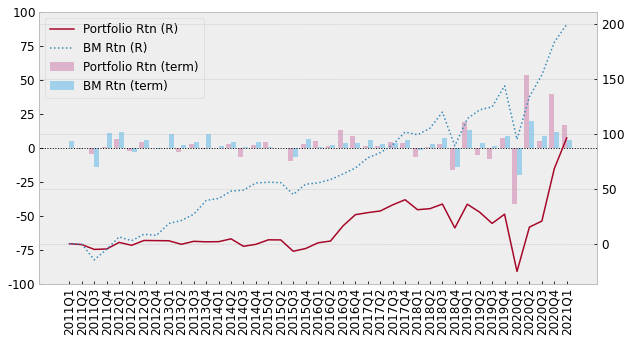

In [45]:
fs.draw_return(df)